# **주요 내용**

*   실험

In [1]:
notebookName = "20200517_4"
notebookName

'20200517_4'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**plot working time & validation loss and accuracy**

In [0]:
import numpy as np

model_names = np.array([["without_sfconv_{}".format(i), "sfconv_ks2_{}".format(i), "sfconv_ks3_{}".format(i), "sfconv_ks5_{}".format(i)] for i in range(10)])

In [4]:
model_names.shape

(10, 4)

In [0]:
model_names = model_names.reshape(10 * 4)

In [8]:
model_names

array(['without_sfconv_0', 'sfconv_ks2_0', 'sfconv_ks3_0', 'sfconv_ks5_0',
       'without_sfconv_1', 'sfconv_ks2_1', 'sfconv_ks3_1', 'sfconv_ks5_1',
       'without_sfconv_2', 'sfconv_ks2_2', 'sfconv_ks3_2', 'sfconv_ks5_2',
       'without_sfconv_3', 'sfconv_ks2_3', 'sfconv_ks3_3', 'sfconv_ks5_3',
       'without_sfconv_4', 'sfconv_ks2_4', 'sfconv_ks3_4', 'sfconv_ks5_4',
       'without_sfconv_5', 'sfconv_ks2_5', 'sfconv_ks3_5', 'sfconv_ks5_5',
       'without_sfconv_6', 'sfconv_ks2_6', 'sfconv_ks3_6', 'sfconv_ks5_6',
       'without_sfconv_7', 'sfconv_ks2_7', 'sfconv_ks3_7', 'sfconv_ks5_7',
       'without_sfconv_8', 'sfconv_ks2_8', 'sfconv_ks3_8', 'sfconv_ks5_8',
       'without_sfconv_9', 'sfconv_ks2_9', 'sfconv_ks3_9', 'sfconv_ks5_9'],
      dtype='<U16')

In [0]:
import numpy as np
import os

previous = "20200517_3"
num_models = 4
num_loop = 10
epochs = 500

working_time = np.zeros((num_models, num_loop))
histories = np.zeros((num_models, num_loop, 4, epochs))

for i, model_name in enumerate(model_names):
    history = np.load(os.path.join("/content/drive/My Drive/results", "{}_{}.npz".format(previous, model_name)))

    histories[i % num_models, i // num_models, 0] = history['accuracy']
    histories[i % num_models, i // num_models, 1] = history['val_accuracy']
    histories[i % num_models, i // num_models, 2] = history['loss']
    histories[i % num_models, i // num_models, 3] = history['val_loss']

    working_time[i % num_models, i // num_models] = history['working_time']

In [18]:
avg_working_time = working_time.mean(axis = 1)
avg_histories = histories.mean(axis = 1)

print(avg_working_time.shape, avg_histories.shape)

(4,) (4, 4, 500)


In [19]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i in range(num_models):
    print("[{}] avg working time: {:.2f} sec".format(mn[i], avg_working_time[i]))

[without sfconv] avg working time: 953.75 sec
[sfconv (kernel size = 2)] avg working time: 981.42 sec
[sfconv (kernel size = 3)] avg working time: 982.37 sec
[sfconv (kernel size = 5)] avg working time: 983.85 sec


In [0]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [0]:
import matplotlib.pyplot as plt

def plot_histories(avg_histories):
    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)
    c = ['r', 'g', 'b', 'm']
    l = ["--", "-", ":", "-."]
    n = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

    plt.subplot(1, 2, 1)
    for i, history in enumerate(avg_histories):
        acc = history[0]
        val_acc = history[1]
        plt.plot(np.arange(1, len(val_acc) + 1, 1), 1 - np.array(smooth_curve(val_acc)),
                 color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])
    plt.title('Averaged Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error Rate')
    plt.ylim([-0.03, 1.03])
    # plt.yscale('log')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.subplot(1, 2, 2)
    for i, history in enumerate(avg_histories):
        loss = history[2]
        val_loss = history[3]
        plt.plot(np.arange(1, len(val_loss) + 1, 1), smooth_curve(val_loss),
                 color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])
    plt.title('Averaged Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.tight_layout()
    plt.show()

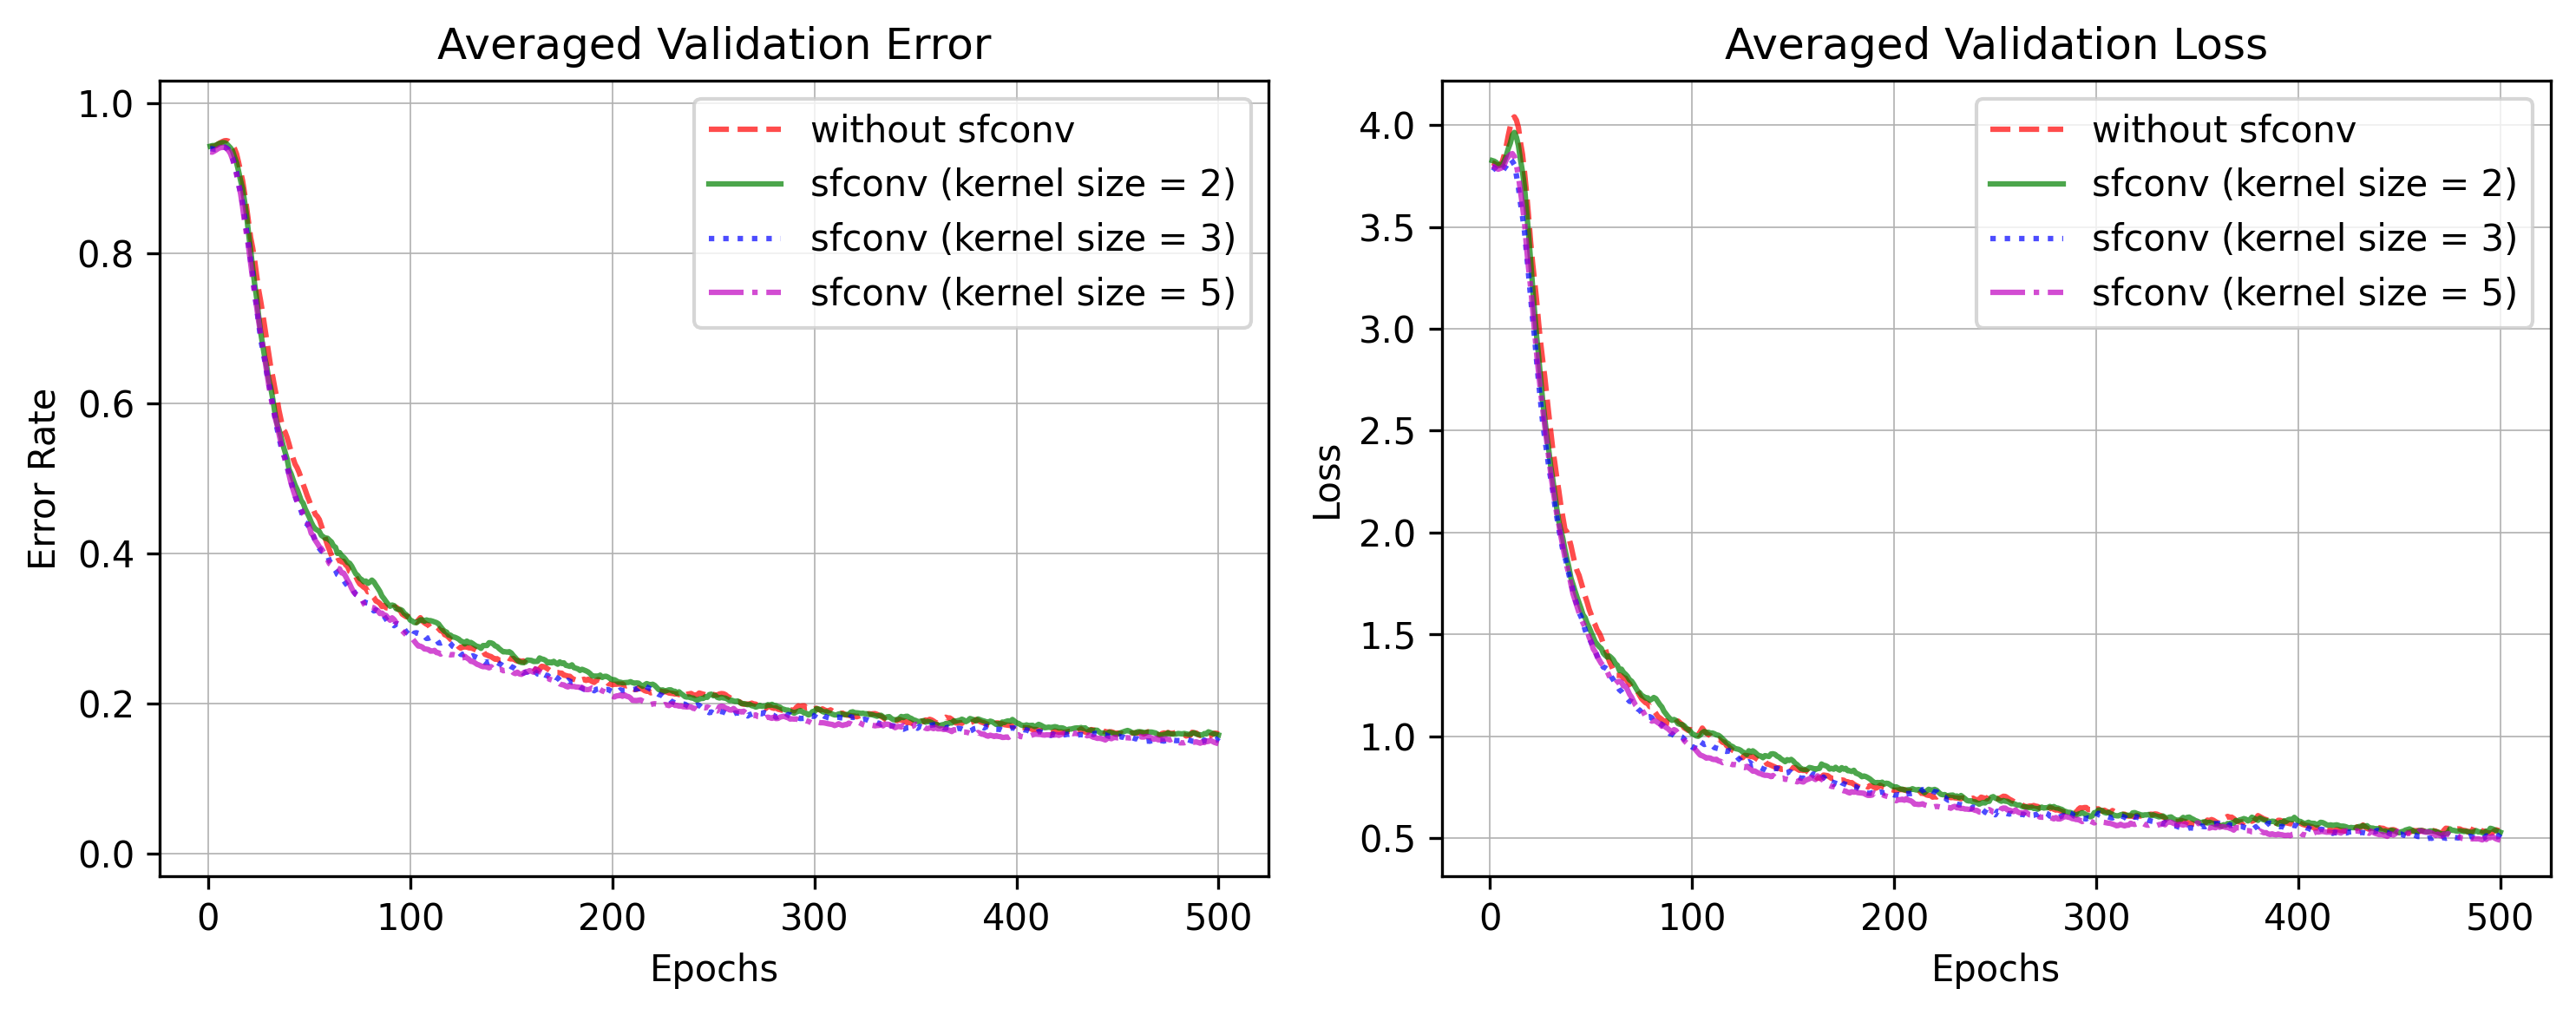

In [22]:
plot_histories(avg_histories)

In [0]:
test_labels = np.zeros((1000, 50))
num_labels = 50

In [0]:
preds = np.zeros((num_models, num_loop, test_labels.shape[0], test_labels.shape[1])) # (3, 10, 1000, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    preds[i % num_models, i // num_models] = pred

In [0]:
test_errors = np.zeros((num_models, num_loop))

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)
    
    test_errors[i % num_models, i // num_models] = np.sum(np.not_equal(np.argmax(pred, axis = 1), y)) / test_labels.shape[0]

In [26]:
test_errors

array([[0.113, 0.13 , 0.147, 0.144, 0.137, 0.087, 0.142, 0.108, 0.11 ,
        0.107],
       [0.154, 0.166, 0.155, 0.147, 0.109, 0.108, 0.09 , 0.111, 0.131,
        0.104],
       [0.136, 0.172, 0.125, 0.227, 0.116, 0.272, 0.149, 0.129, 0.162,
        0.125],
       [0.122, 0.106, 0.112, 0.095, 0.1  , 0.103, 0.132, 0.14 , 0.136,
        0.106]])

In [29]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i in range(num_models):
    print("[{}] avg test error: {:.4f}".format(mn[i], test_errors[i].mean()))

[without sfconv] avg test error: 0.1225
[sfconv (kernel size = 2)] avg test error: 0.1275
[sfconv (kernel size = 3)] avg test error: 0.1613
[sfconv (kernel size = 5)] avg test error: 0.1152


In [0]:
cmcs = np.zeros((num_models, num_loop, 50)) # (3, 10, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)

    a = np.array([sorted(pred[j], reverse = True).index(pred[j, y[j]]) for j in range(len(y))]) # 정답의 순위    
    cmcs[i % num_models, i // num_models] = np.array([len(a[a<=j]) / 1000 for j in range(50)])

In [31]:
print(cmcs)

[[[0.887 0.952 0.969 ... 1.    1.    1.   ]
  [0.87  0.95  0.971 ... 1.    1.    1.   ]
  [0.853 0.938 0.956 ... 1.    1.    1.   ]
  ...
  [0.892 0.954 0.978 ... 1.    1.    1.   ]
  [0.89  0.957 0.977 ... 1.    1.    1.   ]
  [0.893 0.954 0.973 ... 1.    1.    1.   ]]

 [[0.846 0.939 0.968 ... 1.    1.    1.   ]
  [0.834 0.923 0.945 ... 1.    1.    1.   ]
  [0.845 0.924 0.955 ... 1.    1.    1.   ]
  ...
  [0.889 0.956 0.978 ... 1.    1.    1.   ]
  [0.869 0.942 0.968 ... 1.    1.    1.   ]
  [0.896 0.957 0.977 ... 1.    1.    1.   ]]

 [[0.864 0.946 0.967 ... 1.    1.    1.   ]
  [0.828 0.927 0.948 ... 1.    1.    1.   ]
  [0.875 0.942 0.963 ... 1.    1.    1.   ]
  ...
  [0.871 0.947 0.968 ... 1.    1.    1.   ]
  [0.838 0.926 0.956 ... 1.    1.    1.   ]
  [0.875 0.945 0.961 ... 1.    1.    1.   ]]

 [[0.878 0.947 0.97  ... 1.    1.    1.   ]
  [0.894 0.956 0.97  ... 1.    1.    1.   ]
  [0.888 0.952 0.967 ... 1.    1.    1.   ]
  ...
  [0.86  0.942 0.964 ... 1.    1.    1.   ]
  

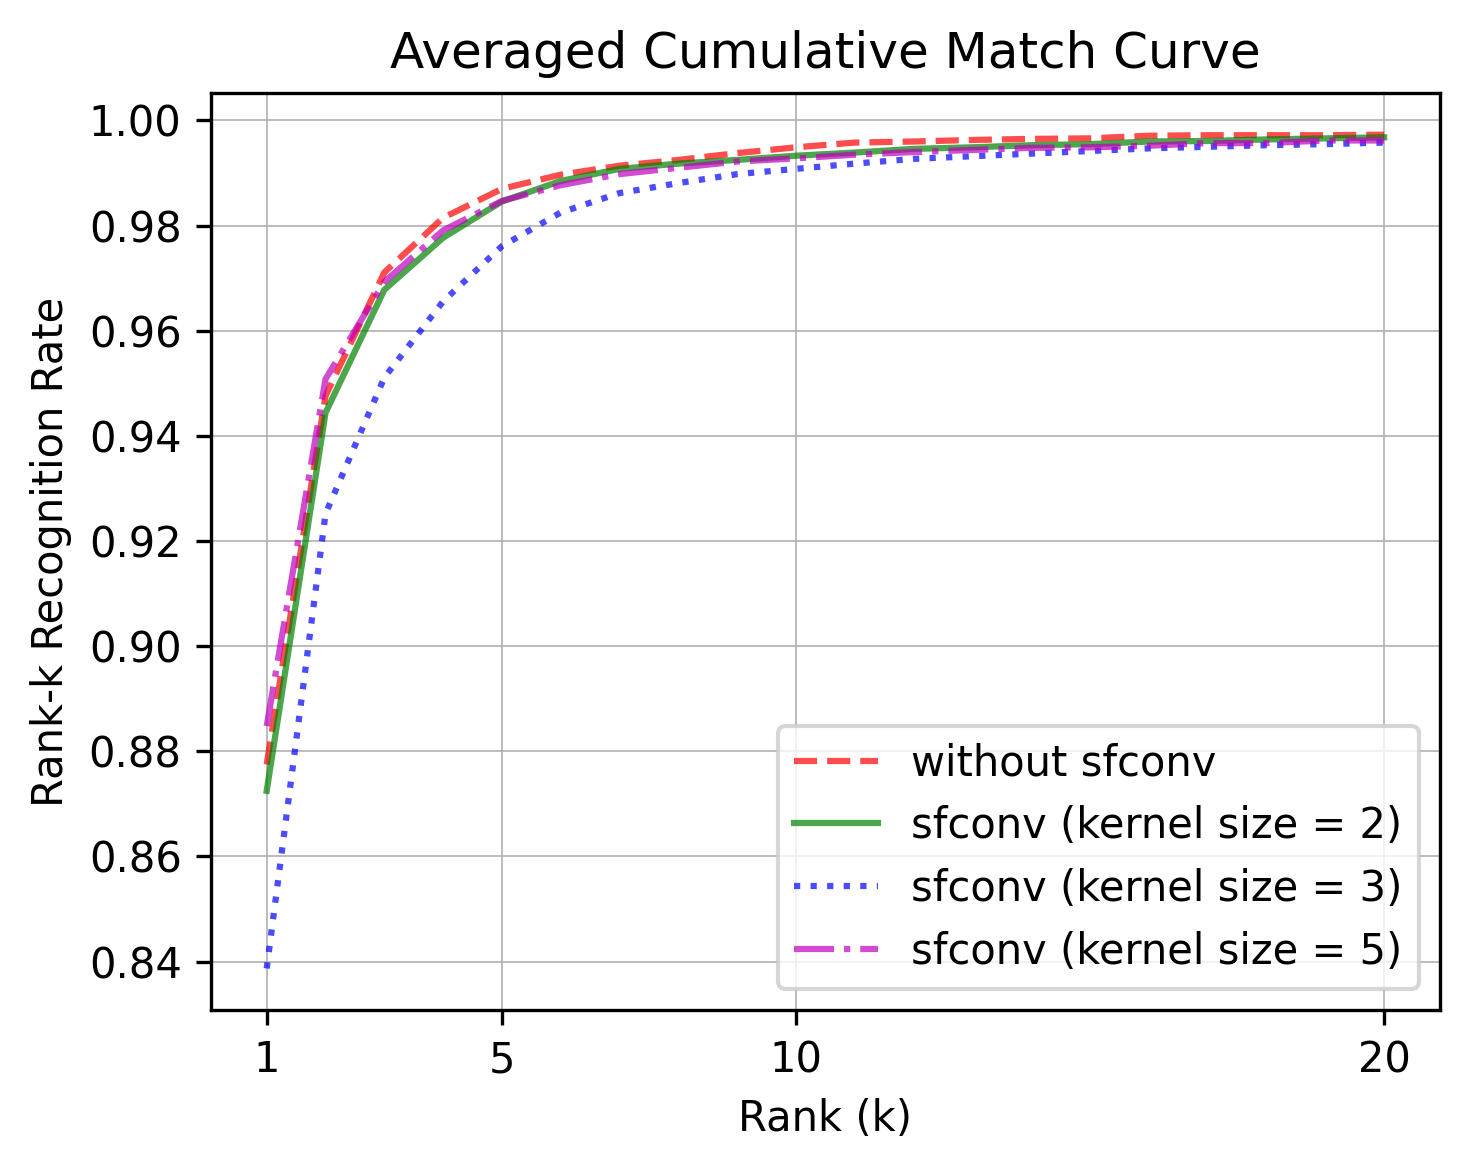

In [34]:
avg_cmcs = cmcs.mean(axis = 1)

fig = plt.figure(figsize = (5, 4), facecolor = 'white', dpi = 300)

for i, model_cmc in enumerate(avg_cmcs):
    c = ['r', 'g', 'b', 'm']
    l = ["--", "-", ":", "-."]
    n = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

    plt.plot(np.arange(1, 21, 1), model_cmc[:20],
             color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])

plt.title('Averaged Cumulative Match Curve')
plt.xlabel('Rank (k)')
plt.ylabel('Rank-k Recognition Rate')
plt.xticks([1, 5, 10, 20])
plt.legend()
plt.grid(True, linewidth = 0.4)

plt.tight_layout()
plt.show()

In [33]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i, cmc in enumerate(avg_cmcs):
    print("[{}] top 1 error: {:.4f}, top 5 error: {:.4f}".format(mn[i], 1 - cmc[0], 1 - cmc[4]))

[without sfconv] top 1 error: 0.1225, top 5 error: 0.0130
[sfconv (kernel size = 2)] top 1 error: 0.1275, top 5 error: 0.0154
[sfconv (kernel size = 3)] top 1 error: 0.1613, top 5 error: 0.0239
[sfconv (kernel size = 5)] top 1 error: 0.1152, top 5 error: 0.0153
